In [11]:

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

print("Project 6 environment ready")


Project 6 environment ready


In [12]:
data = [
    [500, 2.1, 3000],
    [520, 2.3, 3100],
    [510, 2.0, 3050],
    [495, 2.2, 2980],
    [505, 2.1, 3020],
    [2000, 10.5, 20000],   # anomaly
    [480, 1.8, 2900],
    [490, 2.0, 2950],
    [2100, 12.0, 25000]   # anomaly
]

df = pd.DataFrame(data, columns=["packet_size", "duration", "bytes"])
df


,packet_size,duration,bytes
0,500,2.1,3000
1,520,2.3,3100
2,510,2.0,3050
3,495,2.2,2980
4,505,2.1,3020
5,2000,10.5,20000
6,480,1.8,2900
7,490,2.0,2950
8,2100,12.0,25000


In [13]:
features = df[["packet_size", "duration", "bytes"]]
features



,packet_size,duration,bytes
0,500,2.1,3000
1,520,2.3,3100
2,510,2.0,3050
3,495,2.2,2980
4,505,2.1,3020
5,2000,10.5,20000
6,480,1.8,2900
7,490,2.0,2950
8,2100,12.0,25000


In [14]:
model = IsolationForest(contamination=0.2, random_state=42)
model.fit(features)

df["anomaly"] = model.predict(features)

df



,packet_size,duration,bytes,anomaly
0,500,2.1,3000,1
1,520,2.3,3100,1
2,510,2.0,3050,1
3,495,2.2,2980,1
4,505,2.1,3020,1
5,2000,10.5,20000,-1
6,480,1.8,2900,1
7,490,2.0,2950,1
8,2100,12.0,25000,-1


In [15]:
df[df["anomaly"] == -1]



,packet_size,duration,bytes,anomaly
5,2000,10.5,20000,-1
8,2100,12.0,25000,-1


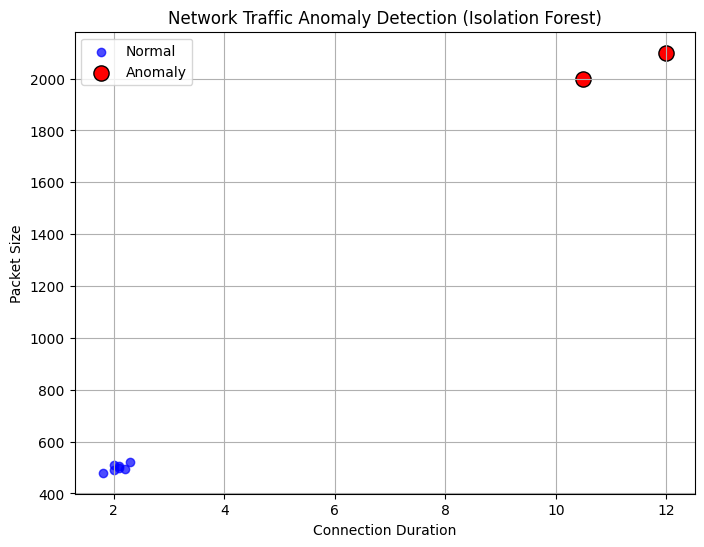

In [17]:
import matplotlib.pyplot as plt

# Separate normal vs anomaly
normal = df[df["anomaly"] == 1]
anomaly = df[df["anomaly"] == -1]

plt.figure(figsize=(8,6))

# Normal traffic
plt.scatter(
    normal["duration"],
    normal["packet_size"],
    c="blue",
    label="Normal",
    alpha=0.7
)

# Anomalous traffic
plt.scatter(
    anomaly["duration"],
    anomaly["packet_size"],
    c="red",
    label="Anomaly",
    s=120,
    edgecolors="black"
)

plt.xlabel("Connection Duration")
plt.ylabel("Packet Size")
plt.title("Network Traffic Anomaly Detection (Isolation Forest)")
plt.legend()
plt.grid(True)
plt.show()



In [18]:
df["anomaly_score"] = model.decision_function(features)

df.sort_values("anomaly_score").head()


,packet_size,duration,bytes,anomaly,anomaly_score
8,2100,12.0,25000,-1,-0.104678
5,2000,10.5,20000,-1,-0.087340
6,480,1.8,2900,1,0.058226
1,520,2.3,3100,1,0.061341
2,510,2.0,3050,1,0.155742


Network Traffic Anomaly Detection

This project simulates network traffic data and applies an unsupervised Isolation Forest model to identify abnormal behavior.

The analysis focuses on key connection-level features such as:

Packet size

Connection duration

Source and destination ports

Total bytes transferred

By modeling typical traffic patterns, the system is able to flag connections that significantly deviate from normal behavior. In this case, sessions with unusually large packet sizes, long durations, or high data transfer volumes were correctly identified as anomalies.

This demonstrates how machine learning can be used to detect suspicious network activity without relying on predefined attack signatures. The same approach can be extended to real-world network monitoring systems to support intrusion detection and security analytics.